## Python中的数据类型
### 整形
#### 2.1.1 Python整形结构
- Python整形实际上是个伪结构体
- 其中包含：
  - ob_refcnt：引用计数，用来处理内存的分配和回收
  - ob_type：将变量的类型编码
  - ob_size：指定接下来的数据成员大小
  - ob_digit：包含Python变量表示的实际的整形值
  
#### Python list
list实际上是一个链表，其中的元素存储的是指向列表内容对象的指针。

#### numpy array
ndarray中的类型是统一的，如果类型不匹配，类型会向上转换（int——>float）

In [1]:
import numpy as np

a = np.array([1, 3.14, 4])#向上转换类型
print(a)

l = [range(i, i + 3) for i in [2, 4, 6]]
print(l)
two_d = np.array([range(i, i + 3) for i in [2, 4, 6]])#构建二维数组
#其中内层列表被当做二维数组的行
print(two_d)

[1.   3.14 4.  ]
[range(2, 5), range(4, 7), range(6, 9)]
[[2 3 4]
 [4 5 6]
 [6 7 8]]


#### 2.1.5 创建数组

In [2]:
# 创建一个长度为10的数组，数组的值都是0
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [3]:
# 创建一个3x5的浮点型数组，数组的值都是1
np.ones((3,5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [4]:
# 创建一个3x5的浮点数组，数组的值都是3.14
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [5]:
# 创建一个3x5的浮点型数组，数组的值是一个线性序列
# 从0开始，到20结束，步长是2
# arange和内置的range类似
a = np.arange(0, 20, 2)
print(a)
l = [i for i in range(0, 20 ,2)]
print(l)
a = np.array(l)
print(a)

[ 0  2  4  6  8 10 12 14 16 18]
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
[ 0  2  4  6  8 10 12 14 16 18]


In [6]:
# 创建一个5个元素的数组，这5个数均匀分配到0-1
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [7]:
# 创建一个3x3的，在0-1内均匀分布的随机数组
np.random.random((3,3))

array([[0.7932808 , 0.91314535, 0.69379238],
       [0.9582536 , 0.62194998, 0.38337043],
       [0.58822957, 0.44915538, 0.42964424]])

In [8]:
# 创建一个3x3均值为0，方差为1的正态分布的随机数组
np.random.normal(0, 1, (3,3))

array([[ 0.70799163,  0.5271874 , -1.13999071],
       [-0.14169692,  0.24919676, -2.40805193],
       [ 0.71764668,  0.36448906, -0.17270788]])

In [9]:
# 创建一个3x3的[0,10)区间的随机整数数组
np.random.randint(0, 10, (3, 3))

array([[3, 7, 3],
       [1, 5, 5],
       [1, 2, 3]])

In [10]:
# 创建3x3的单位矩阵
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [11]:
# 创建一个由3个整数组成的未初始化的数组
# 数组的值是内存空间中的任意值
np.empty(3)

array([1., 1., 1.])

### 2.2 numpy数组基础
#### 2.2.1 numpy数组属性
通过随机数生成器设置随机数种子，这样每次产生的随机数数组都一样

In [12]:
import numpy as np
np.random.seed(0)

x1 = np.random.randint(10, size=6)
print(x1)
x2 = np.random.randint(10, size=(3, 4))#二维数组
print(x2)
x3 = np.random.randint(10, size=(3, 4, 5))#三维数组
print(x3)

[5 0 3 3 7 9]
[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]
[[[8 1 5 9 8]
  [9 4 3 0 3]
  [5 0 2 3 8]
  [1 3 3 3 7]]

 [[0 1 9 9 0]
  [4 7 3 2 7]
  [2 0 0 4 5]
  [5 6 8 4 1]]

 [[4 9 8 1 1]
  [7 9 9 3 6]
  [7 2 0 3 5]
  [9 4 4 6 4]]]


每个数组有
- ndim（数组的维度）
- shape（数组每个维度的大小）
- size（数组总的大小属性）
- 还有dtype（数组的类型）
- itemsize（数组元素字节大小）
- nbytes（数组总字节的大小）

In [13]:
print('x3 ndim: ', x3.ndim)
print('x3 shape: ', x3.shape)
print('x3 size: ',x3.size)
print('x3 dtype: ', x3.dtype)
print('x3 itemsize: ', x3.itemsize)
print('x3 nbytes: ', x3.nbytes)

x3 ndim:  3
x3 shape:  (3, 4, 5)
x3 size:  60
x3 dtype:  int32
x3 itemsize:  4
x3 nbytes:  240


#### 2.2.2数组索引 获取单个元素
- 获得末尾索引，可以用负值
- 在多维数组中，可以用逗号分隔的索引元组获取元素
- **注意** 如果将浮点数类型插入整形数组，那浮点数会被截断成为整形

In [14]:
print(x1)
print(x1[-1])

[5 0 3 3 7 9]
9


In [15]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [16]:
x2[2, 0]

1

In [17]:
x2[2, 0] = 3.14159
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [3, 6, 7, 7]])

#### 2.2.3 数组切片：获取子数组
- 切片形式：x[start:stop:step]
- 默认：start=0, stop=维度的大小, step=1
- 如果step=-1那么默认交换start和stop参数，返回一个逆序的数组

In [18]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
x[:5]#前五个元素

array([0, 1, 2, 3, 4])

In [20]:
x[::2]#隔一个元素

array([0, 2, 4, 6, 8])

In [21]:
x[1::2]

array([1, 3, 5, 7, 9])

In [22]:
x[::-1]#返回逆序数组

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [23]:
x[5::-2]#从5开始每隔一个元素逆序

array([5, 3, 1])

##### 多维子数组

In [24]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [3, 6, 7, 7]])

In [25]:
x2[:2, :3]#行索引在[0,2),列索引在[0,3) 所以是两行三列

array([[3, 5, 2],
       [7, 6, 8]])

In [26]:
x2[::,::2]#所有行，每行隔一列

array([[3, 2],
       [7, 8],
       [3, 7]])

In [27]:
x2[:3, ::2]#同上

array([[3, 2],
       [7, 8],
       [3, 7]])

In [28]:
x2[::-1, ::-1]#子数组维度也可以逆序

array([[7, 7, 6, 3],
       [8, 8, 6, 7],
       [4, 2, 5, 3]])

##### 获取数组的行和列

In [29]:
print(x2[:, 0])#第一列
print(x2[0, :])#第一行
print(x2[0])#可以省略空的切片

[3 7 3]
[3 5 2 4]
[3 5 2 4]


##### 非副本视图的子数组
数组切片返回的是数组数据的视图（修改视图可以修改原数组）而不是原数组的副本（拷贝）**这里是ndarray和list不同的地方**

In [30]:
x2[0, 0] = 3
print(x2)
x2_sub = x2[:2, :2]
print(x2_sub)



[[3 5 2 4]
 [7 6 8 8]
 [3 6 7 7]]
[[3 5]
 [7 6]]


In [31]:
#修改视图，原来的数组也会改变
x2_sub[0, 0] = 99
print(x2_sub)
print(x2)

[[99  5]
 [ 7  6]]
[[99  5  2  4]
 [ 7  6  8  8]
 [ 3  6  7  7]]


#### 2.2.4 数组的变形
- 数组变形可以通过reshape()函数来实现

In [32]:
grid = np.arange(1, 10)
print(grid)
grid = grid.reshape(3, 3)
print(grid)

[1 2 3 4 5 6 7 8 9]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


将一个一维数组转变为二维的行或者列的矩阵，可以通过reshape或者在一个切片操作中用newaxis这样的关键字

In [33]:
x = np.arange(3)
print(x. reshape((1, 3)))#通过变形得到行向量
print(x[np.newaxis, :])#通过变形得到行向量

print(x[:, np.newaxis])#通过变形得到列向量
print(x.reshape(3, 1))

[[0 1 2]]
[[0 1 2]]
[[0]
 [1]
 [2]]
[[0]
 [1]
 [2]]


#### 2.2.5数组的拼接和分裂
- 数组的拼接可以通过np.concatenate np.vstack np.hstack实现

In [34]:
x = np.arange(1, 4)
y = x[::-1].copy()
print(x)
print(y)

np.concatenate([x, y])

[1 2 3]
[3 2 1]


array([1, 2, 3, 3, 2, 1])

In [35]:
z = np.arange(97,100)
np.concatenate([x, y, z])

array([ 1,  2,  3,  3,  2,  1, 97, 98, 99])

np.concatenate也可以用于二维数组的拼接
- 默认是行拼接（列数量不变，添加行数）
- axis=1是列拼接（行数不变，添加列数）

In [36]:
grid = np.arange(1, 7)
grid = grid.reshape((2, 3))

np.concatenate([grid, grid])#行拼接

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [37]:
np.concatenate([grid, grid], axis=1)#列拼接（从第二个轴开始）

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

- 数组的分类二可以通过np.split np.hsplit np.vsplit函数来实现
- 可以向以上函数传递一个索引列表作为参数，索引列表记录的是分裂点的位置

In [38]:
x = np.arange(1, 10)
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [4 5] [6 7 8 9]


In [39]:
grid = np.arange(16).reshape(4, 4)
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [40]:
upper, lower = np.vsplit(grid, [2])#按照行索引进行分裂（vsplit)
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [41]:
left, right = np.hsplit(grid ,[2])#按照列索引进行分裂（hsplit）
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


### 2.3 numpy数组的计算：通用函数
Numpy中的向量操作是通过通用函数实现的，通用函数的主要目的是对numpy中的值执行更快的重复操作。

In [42]:
#对两个数组进行运算
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [43]:
#进行多维数组的运算
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]], dtype=int32)

#### 2.3.3numpy的通用函数
通用函数有两种存在形式：
- 一元通用函数对单个输入进行操作。
- 二元通用函数对两个输入进行操作

In [44]:
x = np.arange(1, 5)
print(x)
print('x + 5 ', x + 5)
print('x - 5 ', x - 5)
print('x * 2 ', x * 2)
print('x / 2 ', x / 2)
print('x // 2 ', x // 2)#向下取整除法

[1 2 3 4]
x + 5  [6 7 8 9]
x - 5  [-4 -3 -2 -1]
x * 2  [2 4 6 8]
x / 2  [0.5 1.  1.5 2. ]
x // 2  [0 1 1 2]


In [45]:
#绝对值
x = np.arange(-10, 0)
abs(x)

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [46]:
# 三角函数
theta = np.linspace(0, np.pi, 3)
print(theta)
print('sin ', np.sin(theta))
print('cos ', np.cos(theta))

[0.         1.57079633 3.14159265]
sin  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos  [ 1.000000e+00  6.123234e-17 -1.000000e+00]


In [47]:
#指数运算
x = np.arange(1, 4)
print(x)
print('e^x ', np.exp(x))
print('2^x ',np.exp2(x))
print('3^x ',np.power(3, x))

[1 2 3]
e^x  [ 2.71828183  7.3890561  20.08553692]
2^x  [2. 4. 8.]
3^x  [ 3  9 27]


#### 2.3.4 高级的通用函数特性
##### 01指定输出
在进行大量运算的时候，可以通过out参数直接将计算结果放到指定的存储位置

In [48]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out = y)
print(y)

[ 0. 10. 20. 30. 40.]


In [49]:
y = np.zeros(10)
np.power(2, x, out=y[::2])#这里是直接将运算结果赋值给y
print(y)

y[::2] = 2 ** x#这里是先产生一个临时数组保存计算结果，然后再复制给数组y
#这样多了一倍的内存开销
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]
[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


###### 02 聚合
- 聚合可以直接在对象上进行计算。
- 可以使用reduce方法，对给定的元素和操作重复执行，直到得到单个的结果
- 可以通过accumulate保存每次计算的结果

In [50]:
x = np.arange(1, 6)
np.add.reduce(x)

15

In [51]:
np.multiply.reduce(x)

120

In [52]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15], dtype=int32)

In [53]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120], dtype=int32)

###### 03 外积
通过outer方法获得两个不同输入数组所有元素对的函数运算结果

In [54]:
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

#### 2.4 聚合
##### 2.4.1 求和
numpy的sum函数在编译码中执行操作，所以numpy的操作计算得更快一些
numpy的sum函数是知道数组的维度的

In [55]:
L = np.random.random(100)
np.sum(L)

52.12818058833702

In [56]:
sum(L)

52.12818058833704

#### 2.4.2 最小值 最大值
np.min np.max相比Python自带的min max执行的更快，可以被数组对象直接调用

In [57]:
big_array = np.random.rand(10000)
big_array

array([0.16684751, 0.77905102, 0.8649333 , ..., 0.80857013, 0.22024755,
       0.06067166])

In [58]:
np.min(big_array), np.max(big_array)

(2.0027530115096503e-05, 0.9999709462497284)

###### 01多维度 聚合
常用的聚合操作是沿着一行或者一列聚合

In [59]:
M = np.random.random((3, 4))
M

array([[0.23671929, 0.61831211, 0.75523496, 0.43955357],
       [0.96459204, 0.97180013, 0.93021658, 0.51556346],
       [0.08020503, 0.53148262, 0.44476448, 0.41975784]])

聚合函数有一个参数，axis 用于指定沿着轴的哪个方向进行聚合。
- axis=0：沿着列方向进行聚合
- axis=1：沿着行方向进行聚合

In [60]:
M.min(axis=0)#找到每一列的最小值

array([0.08020503, 0.53148262, 0.44476448, 0.41975784])

In [61]:
M.min(axis=1)#找到每一行的最小值

array([0.23671929, 0.51556346, 0.08020503])

In [62]:
import pandas as pd 
data = pd.read_csv('housing.csv')
data
median_income = np.array(data['median_income'])
print(median_income)
print('Mean median_income ', median_income.mean())
print('Standard deviation ',median_income.std())


[8.3252 8.3014 7.2574 ... 1.7    1.8672 2.3886]
Mean median_income  3.8706710029069766
Standard deviation  1.8997756945748738


In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()


Text(0, 0.5, 'Number')

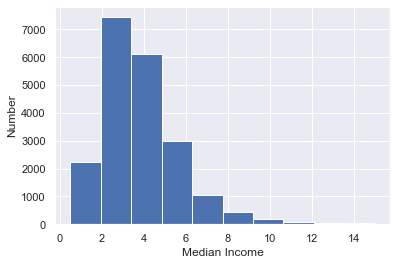

In [64]:
plt.hist(median_income)
plt.xlabel('Median Income')
plt.ylabel('Number')

### 2.5广播
广播可以理解为用于不同大小数组的二进制通用函数（加减乘除等）的一组规则
- 广播允许二进制操作用于不同大小的数组，如可以简单的将一个标量（可以认为是一个零维的数组）和一个数组相加

In [65]:
a = np.arange(1, 6)
a + 5

array([ 6,  7,  8,  9, 10])

可以认为是这个操作将数值5扩展至重复数组[5, 5, 5, 5, 5] 然后执行加法
numpy广播的好处就是这种对值的重复实际上并没有发生。
同样也可以将这种广播扩展至更高维度的数组

In [66]:
M = np.ones((5, 5))
M

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [67]:
M + a#沿着第二个维度 axis=1 列 进行扩展

array([[2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.]])

In [68]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)

a + b#行和列同时进行扩展

[0 1 2]
[[0]
 [1]
 [2]]


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

#### 2.5.3 广播的实际应用
##### 01 数组的归一化
通过X-X.mean()进行归一化，该操作是个广播操作

In [69]:
X = np.random.random((10, 3))
X

array([[0.84839879, 0.39881191, 0.09862396],
       [0.96699509, 0.95168772, 0.8138357 ],
       [0.94273935, 0.21287576, 0.44830036],
       [0.01479108, 0.65302541, 0.76584946],
       [0.70995648, 0.2128151 , 0.08552944],
       [0.77890462, 0.12834281, 0.68664221],
       [0.87607812, 0.85422207, 0.18266558],
       [0.92603147, 0.820149  , 0.32315133],
       [0.25206038, 0.80663055, 0.44301059],
       [0.50970416, 0.02992361, 0.84643519]])

In [70]:
Xmean = X.mean(0)#注意要给定维度，不然就是所有数据的平均值
Xmean

array([0.68256595, 0.50684839, 0.46940438])

In [71]:
X_centered = X - Xmean
X_centered

array([[ 0.16583283, -0.10803649, -0.37078042],
       [ 0.28442913,  0.44483933,  0.34443131],
       [ 0.2601734 , -0.29397263, -0.02110402],
       [-0.66777487,  0.14617701,  0.29644508],
       [ 0.02739052, -0.2940333 , -0.38387494],
       [ 0.09633867, -0.37850558,  0.21723782],
       [ 0.19351217,  0.34737367, -0.2867388 ],
       [ 0.24346552,  0.31330061, -0.14625305],
       [-0.43050557,  0.29978216, -0.02639379],
       [-0.17286179, -0.47692479,  0.37703081]])

In [72]:
X_centered = X_centered - X_centered.mean(0)
X_centered.mean(0)#现在可以看到均值接近与0，归一化成功

array([-1.11022302e-17, -1.11022302e-17,  0.00000000e+00])

In [73]:
X_mean_norm = (X - X.mean(0)) / (X.max(0) - X.min(0))#使用均值归一化
print(X.max(0), X.min(0))
X_mean_norm.mean(0)

[0.96699509 0.95168772 0.84643519] [0.01479108 0.02992361 0.08552944]


array([4.44089210e-17, 1.11022302e-16, 0.00000000e+00])

##### 02 画一个二维函数
广播能基于二维函数显示图像，定义一个函数z = f(x, y) 可以用广播沿着竖直区间计算该函数

In [74]:
x = np.linspace(0, 5, 50)
print(x)
y = np.linspace(0, 5, 50)[:, np.newaxis]#newaxis的作用实际上是增加一个维度，从一位数组变成了二维矩阵
print(y)
z = np.sin(x) **10 + np.cos(10 + y * x) * np.cos(x)

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[[0.        ]
 [0.10204082]
 [0.20408163]
 [0.30612245]
 [0.40816327]
 [0.51020408]
 [0.6122449 ]
 [0.71428571]
 [0.81632653]
 [0.91836735]
 [1.02040816]
 [1.12244898]
 [1.2244898 ]
 [1.32653061]
 [1.42857143]
 [1.53061224]
 [1.63265306]
 [1.73469388]
 [1.83673469]
 [1.93877551]
 [2.04081633]
 [2.14285714]
 [2.24489796]
 [2.34693878]
 [2.44897959]
 [2.55102041]
 [2.65306122]
 [2.75510204]
 [2.85714286]
 [2.95918367]
 [3.06122449]
 [3.16

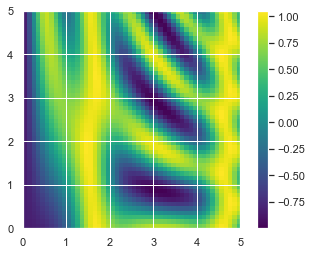

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar()

#### 2.6比较 掩码 布尔逻辑


In [76]:
x = np.arange(1, 6)
x < 3

array([ True,  True, False, False, False])

利用复合表达式实现对两个数组的逐元素比较

In [77]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

##### 2.6.3 操作布尔数组

In [78]:
rng = np.random.RandomState(0)#每次都产生相同的随机数
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

###### 01 统计记录的个数
np.count_nonzero记录数组里面True的个数

In [79]:
#有多少值小于6
np.count_nonzero(x < 6)

8

##### 2.6.4 将布尔数组作为掩码
可以使用布尔数组作为掩码，筛选出符合条件的子数据集

In [80]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [81]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [82]:
x[x < 5]#反悔了所有表达式条件为True的值。是一个一位数组

array([0, 3, 3, 3, 2, 4])

**注意**
- 在Python中，and or是将对象当做布尔类型，非零的整数都是True。
- 对整数使用& | 的是哦户，表达式操作的是元素的比特位，将and or应用于组成该数字的每个比特


#### 2.7 花哨的索引
能够让我们快速获得并且修改复杂的数组值的子数据集

In [83]:
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)
print(x.mean())
print(x.std())

[51 92 14 71 60 20 82 86 74 74]
62.4
25.370061095708856


获得三个不同元素的办法
- 挨个写索引x[i], x[j],
- 传入一个列表，将列表作为索引

In [84]:
[x[3], x[5], x[7]]

[71, 20, 86]

In [85]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

也可以传入一个二维数组，获得的数组结果形状与索引数组的形状一致

In [86]:
ind = np.arange(1, 8, 2).reshape(-1, 2)
print(ind)
print(x[ind])

[[1 3]
 [5 7]]
[[92 71]
 [20 86]]


也适用于多个维度

In [87]:
X = np.arange(12).reshape((3, 4))
print(X)
row = np.arange(3)
col = np.arange(3)[::-1].copy()
X[row, col]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([2, 5, 8])

这个索引也遵循广播的结果。

In [88]:
print(row[:, np.newaxis])#先选择行
print(col)#再按照顺序选择列
X[row[:, np.newaxis], col]

[[0]
 [1]
 [2]]
[2 1 0]


array([[ 2,  1,  0],
       [ 6,  5,  4],
       [10,  9,  8]])

#### 2.7.2 组合索引

In [89]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

将切片和花哨索引组合使用

In [90]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

#### 2.7.3 随机选择点
若有一个NxD的矩阵，表示再D维度的N个点。生成一个二维正态分布的点组成的数组

In [91]:
mean = np.zeros((2))
cov = [[1, 2],
        [2, 5]]
mean, cov
X = rand.multivariate_normal(mean, cov, 100)
X.shape, X

((100, 2),
 array([[-0.644508  , -0.46220608],
        [ 0.7376352 ,  1.21236921],
        [ 0.88151763,  1.12795177],
        [ 2.04998983,  5.97778598],
        [-0.1711348 , -2.06258746],
        [ 0.67956979,  0.83705124],
        [ 1.46860232,  1.22961093],
        [ 0.35282131,  1.49875397],
        [-2.51552505, -5.64629995],
        [ 0.0843329 , -0.3543059 ],
        [ 0.19199272,  1.48901291],
        [-0.02566217, -0.74987887],
        [ 1.00569227,  2.25287315],
        [ 0.49514263,  1.18939673],
        [ 0.0629872 ,  0.57349278],
        [ 0.75093031,  2.99487004],
        [-3.0236127 , -6.00766046],
        [-0.53943081, -0.3478899 ],
        [ 1.53817376,  1.99973464],
        [-0.50886808, -1.81099656],
        [ 1.58115602,  2.86410319],
        [ 0.99305043,  2.54294059],
        [-0.87753796, -1.15767204],
        [-1.11518048, -1.87508012],
        [ 0.4299908 ,  0.36324254],
        [ 0.97253528,  3.53815717],
        [ 0.32124996,  0.33137032],
        [-0.74618

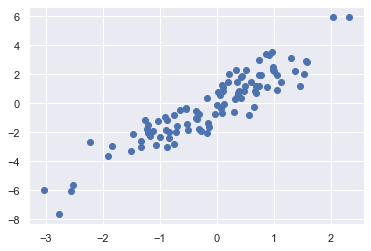

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.scatter(X[:, 0], X[:, 1])

In [93]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([ 6, 97, 66, 47,  7, 17,  4, 87,  8, 65, 45, 42, 24, 43, 78, 90, 71,
       51, 53, 55])

In [94]:
selection = X[indices]
selection.shape,selection

((20, 2),
 array([[ 1.46860232,  1.22961093],
        [ 0.09619333, -0.64335574],
        [-0.14547282, -1.34125678],
        [-0.35490984, -1.03657119],
        [ 0.35282131,  1.49875397],
        [-0.53943081, -0.3478899 ],
        [-0.1711348 , -2.06258746],
        [-2.56215914, -6.08410838],
        [-2.51552505, -5.64629995],
        [-0.1317045 , -1.64159158],
        [ 2.32083881,  5.97698647],
        [ 0.02815138,  0.79654924],
        [ 0.4299908 ,  0.36324254],
        [ 0.37785618,  0.51409383],
        [-1.47656656, -2.13046298],
        [ 0.01374713, -0.11539344],
        [-2.23176235, -2.63958101],
        [ 1.3707365 ,  2.2348831 ],
        [ 0.6074983 ,  1.47089233],
        [ 0.69226246,  1.21504303]]))

#### 2.7.4 用花哨的索引修改值
可以用于获取部分数组，也可以用于修改部分数组

In [95]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)
x[i] -= 10
print(x)

[ 0 99 99  3 99  5  6  7 99  9]
[ 0 89 89  3 89  5  6  7 89  9]


注意不要使用重复的索引 会出现问题
- 如果要实现累加 可以用at操作

In [96]:
x = np.zeros(10)
i = [2, 3, 3, 4, 4, 4]
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


#### 2.7.5 数据区间划分
假定有1000个值，可以通过ufunc.at来计算快速统计分布在每个区间中的数据频次

C:\Users\ADRIN\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  if sys.path[0] == '':


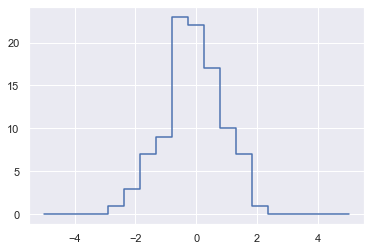

In [97]:
np.random.seed(42)
x = np.random.randn(100)

#手动计算直方图
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

#为每个x找到合适的区间
i = np.searchsorted(bins, x)
#在bins数组中（必须是升序）插入x，返回的是x中每个元素在bins中合适的数组下标
np.add.at(counts, i, 1)
plt.plot(bins, counts, linestyle='steps')

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <a list of 19 Patch objects>)

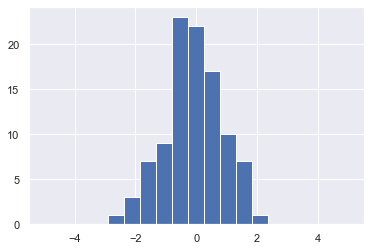

In [98]:
plt.hist(x, bins)


### 2.8数组的排序

#### 2.8.1 numpy中的快排
- np.sort
- np.argsort

In [99]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)#不修改原数组

array([1, 2, 3, 4, 5])

In [100]:
x.sort()#修改原数组
print(x)

[1 2 3 4 5]


In [101]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)#返回的是原数组排好序的索引值
print(i)

[1 0 3 2 4]


可以沿着多维数组的行或者列进行排序

In [102]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [103]:
np.sort(X, axis=0)#对每一列进行排序

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [104]:
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

### 2.8.2 部分排序：分隔
通过np.partition函数可以实现找到数组中第k小的值
输入时数组和数字k，输出结果是一个新的数组，最左边是第k校的值。往右是任意顺序的其他值

In [105]:
x = np.array([7, 2, 3, 1 ,6])
np.partition(x, 3)

array([1, 3, 2, 6, 7])

结果中前三个值是数组中最小的三个值，剩下的位置是原始数组中剩下的值

In [106]:
np.partition(X, 2, axis=1)#也可以沿着轴进行排序
#每个行前面两个元素都是该行最小的两个数

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

### 2.8.3 K个最邻近
通过argsort函数沿着多个轴快速找到集合中每个点的最邻近。

In [107]:
X = rand.rand(10, 2)
X

array([[0.00706631, 0.02306243],
       [0.52477466, 0.39986097],
       [0.04666566, 0.97375552],
       [0.23277134, 0.09060643],
       [0.61838601, 0.38246199],
       [0.98323089, 0.46676289],
       [0.85994041, 0.68030754],
       [0.45049925, 0.01326496],
       [0.94220176, 0.56328822],
       [0.3854165 , 0.01596625]])

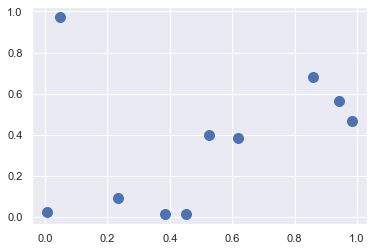

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()#设置画图风格
plt.scatter(X[:, 0], X[:, 1], s=100)

In [109]:
X[:, np.newaxis, :], X[np.newaxis, :, :]

(array([[[0.00706631, 0.02306243]],
 
        [[0.52477466, 0.39986097]],
 
        [[0.04666566, 0.97375552]],
 
        [[0.23277134, 0.09060643]],
 
        [[0.61838601, 0.38246199]],
 
        [[0.98323089, 0.46676289]],
 
        [[0.85994041, 0.68030754]],
 
        [[0.45049925, 0.01326496]],
 
        [[0.94220176, 0.56328822]],
 
        [[0.3854165 , 0.01596625]]]),
 array([[[0.00706631, 0.02306243],
         [0.52477466, 0.39986097],
         [0.04666566, 0.97375552],
         [0.23277134, 0.09060643],
         [0.61838601, 0.38246199],
         [0.98323089, 0.46676289],
         [0.85994041, 0.68030754],
         [0.45049925, 0.01326496],
         [0.94220176, 0.56328822],
         [0.3854165 , 0.01596625]]]))

计算两点间的距离，通过np的广播和聚合进行计算。

In [110]:
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]#通过广播求每两个点之间的距离
differences

array([[[ 0.        ,  0.        ],
        [-0.51770836, -0.37679855],
        [-0.03959936, -0.95069309],
        [-0.22570504, -0.06754401],
        [-0.6113197 , -0.35939957],
        [-0.97616458, -0.44370047],
        [-0.8528741 , -0.65724511],
        [-0.44343295,  0.00979746],
        [-0.93513545, -0.54022579],
        [-0.3783502 ,  0.00709617]],

       [[ 0.51770836,  0.37679855],
        [ 0.        ,  0.        ],
        [ 0.478109  , -0.57389455],
        [ 0.29200332,  0.30925454],
        [-0.09361135,  0.01739898],
        [-0.45845623, -0.06690192],
        [-0.33516575, -0.28044657],
        [ 0.07427541,  0.38659601],
        [-0.4174271 , -0.16342725],
        [ 0.13935816,  0.38389472]],

       [[ 0.03959936,  0.95069309],
        [-0.478109  ,  0.57389455],
        [ 0.        ,  0.        ],
        [-0.18610568,  0.88314908],
        [-0.57172035,  0.59129353],
        [-0.93656522,  0.50699263],
        [-0.81327474,  0.29344798],
        [-0.40383359,  0

In [111]:
#计算差值的平方
sq_differences = differences ** 2
sq_differences

array([[[0.00000000e+00, 0.00000000e+00],
        [2.68021941e-01, 1.41977145e-01],
        [1.56810915e-03, 9.03817359e-01],
        [5.09427629e-02, 4.56219322e-03],
        [3.73711781e-01, 1.29168048e-01],
        [9.52897288e-01, 1.96870105e-01],
        [7.27394233e-01, 4.31971139e-01],
        [1.96632778e-01, 9.59902985e-05],
        [8.74478311e-01, 2.91843907e-01],
        [1.43148872e-01, 5.03556687e-05]],

       [[2.68021941e-01, 1.41977145e-01],
        [0.00000000e+00, 0.00000000e+00],
        [2.28588213e-01, 3.29354951e-01],
        [8.52659388e-02, 9.56383688e-02],
        [8.76308468e-03, 3.02724521e-04],
        [2.10182111e-01, 4.47586710e-03],
        [1.12336078e-01, 7.86502769e-02],
        [5.51683628e-03, 1.49456475e-01],
        [1.74245380e-01, 2.67084648e-02],
        [1.94206961e-02, 1.47375156e-01]],

       [[1.56810915e-03, 9.03817359e-01],
        [2.28588213e-01, 3.29354951e-01],
        [0.00000000e+00, 0.00000000e+00],
        [3.46353231e-02, 7.799

In [112]:
#将差值求和获得平方距离
dist_sq = sq_differences.sum(-1)#沿着最后一个轴进行求和
dist_sq

array([[0.        , 0.40999909, 0.90538547, 0.05550496, 0.50287983,
        1.14976739, 1.15936537, 0.19672877, 1.16632222, 0.14319923],
       [0.40999909, 0.        , 0.55794316, 0.18090431, 0.00906581,
        0.21465798, 0.19098635, 0.15497331, 0.20095384, 0.16679585],
       [0.90538547, 0.55794316, 0.        , 0.81458763, 0.67649219,
        1.13419594, 0.74752753, 1.08562368, 0.9704683 , 1.03211241],
       [0.05550496, 0.18090431, 0.81458763, 0.        , 0.23387834,
        0.70468321, 0.74108843, 0.05338715, 0.72671958, 0.0288717 ],
       [0.50287983, 0.00906581, 0.67649219, 0.23387834, 0.        ,
        0.14021843, 0.1470605 , 0.16449241, 0.13755476, 0.18859392],
       [1.14976739, 0.21465798, 1.13419594, 0.70468321, 0.14021843,
        0.        , 0.06080186, 0.48946337, 0.01100053, 0.56059965],
       [1.15936537, 0.19098635, 0.74752753, 0.74108843, 0.1470605 ,
        0.06080186, 0.        , 0.61258786, 0.02046045, 0.66652228],
       [0.19672877, 0.15497331, 1.0856236

In [113]:
nearest = np.argsort(dist_sq, axis = 1)#按照每行从小到大进行排序，返回的是索引值
nearest

array([[0, 3, 9, 7, 1, 4, 2, 5, 6, 8],
       [1, 4, 7, 9, 3, 6, 8, 5, 0, 2],
       [2, 1, 4, 6, 3, 0, 8, 9, 7, 5],
       [3, 9, 7, 0, 1, 4, 5, 8, 6, 2],
       [4, 1, 8, 5, 6, 7, 9, 3, 0, 2],
       [5, 8, 6, 4, 1, 7, 9, 3, 2, 0],
       [6, 8, 5, 4, 1, 7, 9, 3, 2, 0],
       [7, 9, 3, 1, 4, 0, 5, 8, 6, 2],
       [8, 5, 6, 4, 1, 7, 9, 3, 2, 0],
       [9, 7, 3, 0, 1, 4, 5, 8, 6, 2]], dtype=int64)

In [115]:
#上面这些计算距离的语句实际上和这句话相等
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)
dist_sq

array([[0.        , 0.40999909, 0.90538547, 0.05550496, 0.50287983,
        1.14976739, 1.15936537, 0.19672877, 1.16632222, 0.14319923],
       [0.40999909, 0.        , 0.55794316, 0.18090431, 0.00906581,
        0.21465798, 0.19098635, 0.15497331, 0.20095384, 0.16679585],
       [0.90538547, 0.55794316, 0.        , 0.81458763, 0.67649219,
        1.13419594, 0.74752753, 1.08562368, 0.9704683 , 1.03211241],
       [0.05550496, 0.18090431, 0.81458763, 0.        , 0.23387834,
        0.70468321, 0.74108843, 0.05338715, 0.72671958, 0.0288717 ],
       [0.50287983, 0.00906581, 0.67649219, 0.23387834, 0.        ,
        0.14021843, 0.1470605 , 0.16449241, 0.13755476, 0.18859392],
       [1.14976739, 0.21465798, 1.13419594, 0.70468321, 0.14021843,
        0.        , 0.06080186, 0.48946337, 0.01100053, 0.56059965],
       [1.15936537, 0.19098635, 0.74752753, 0.74108843, 0.1470605 ,
        0.06080186, 0.        , 0.61258786, 0.02046045, 0.66652228],
       [0.19672877, 0.15497331, 1.0856236

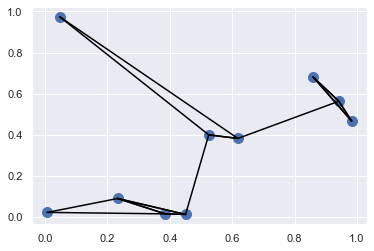

In [117]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
plt.scatter(X[:, 0], X[:, 1], s=100)

#将每个点和他的最邻近点连接
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')

### 2.9结构化数组


In [1]:
import numpy as np


In [2]:

x = np.zeros(4, dtype=int)
x

array([0, 0, 0, 0])